In [18]:
from sklearn .cluster import DBSCAN
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [19]:
df=pd.read_csv(r"C:\Users\kurva\OneDrive\Desktop\customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [20]:
df.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [21]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [22]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [23]:
df.sum()

Channel                 582
Region                 1119
Fresh               5280131
Milk                2550357
Grocery             3498562
Frozen              1351650
Detergents_Paper    1267857
Delicassen           670943
dtype: int64

In [24]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
435    False
436    False
437    False
438    False
439    False
Length: 440, dtype: bool

In [25]:
df['Channel'].unique()

array([2, 1], dtype=int64)

In [26]:
df['Region'].unique()

array([3, 1, 2], dtype=int64)

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

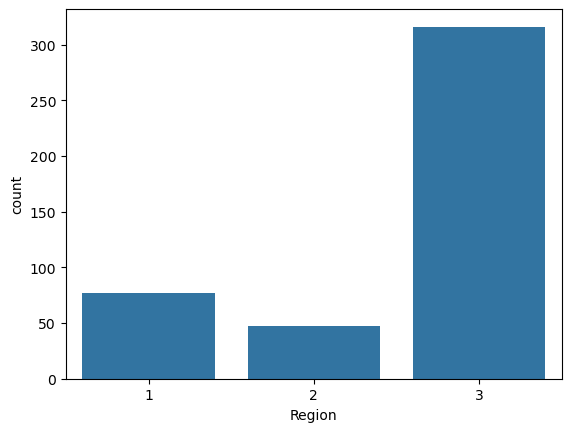

In [28]:
sns.countplot(x=df['Region'])
plt.show()

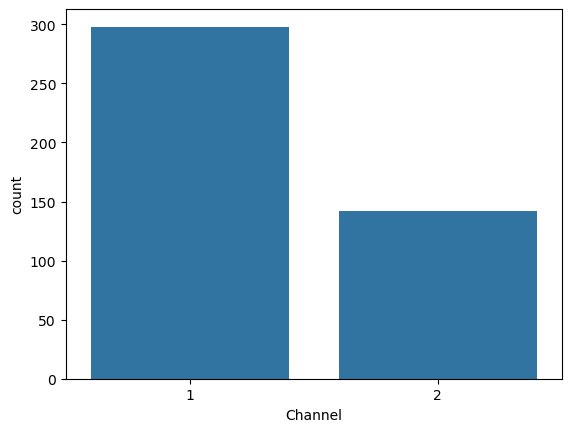

In [29]:
sns.countplot(x=df['Channel'])
plt.show()

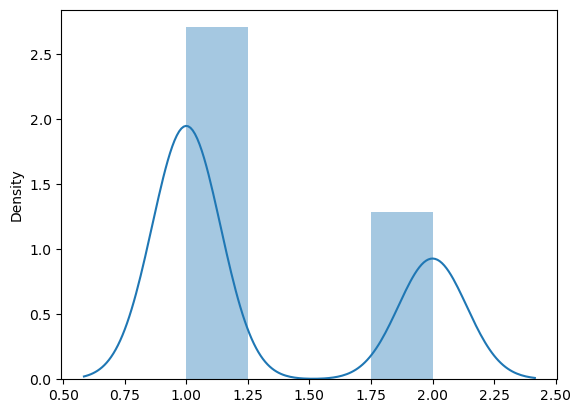

In [30]:
sns.distplot(x=df['Channel'])
plt.show()

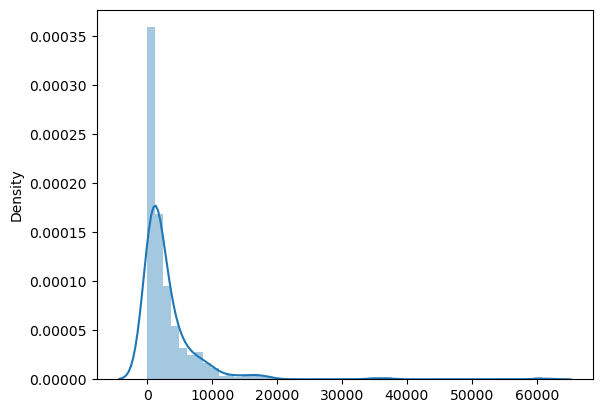

In [31]:
sns.distplot(x=df['Frozen'])
plt.show()

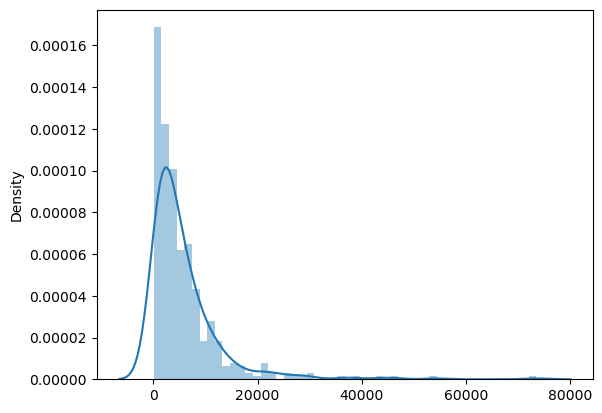

In [32]:
sns.distplot(x=df['Milk'])
plt.show()

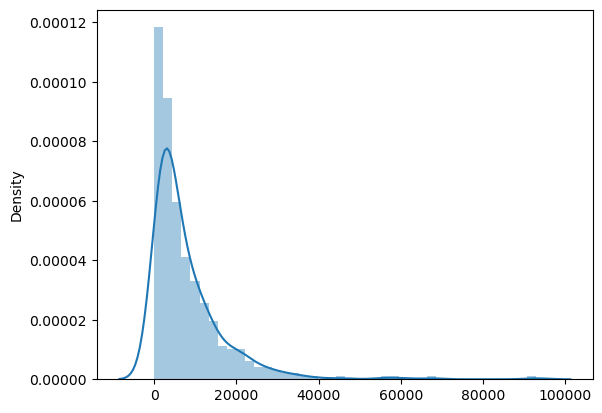

In [33]:
sns.distplot(x=df['Grocery'])
plt.show()

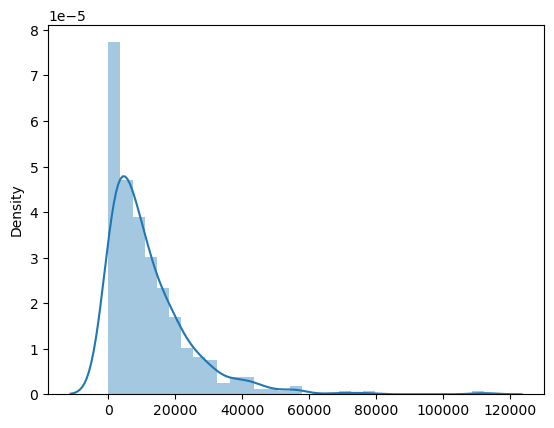

In [34]:
sns.distplot(x=df['Fresh'])
plt.show()

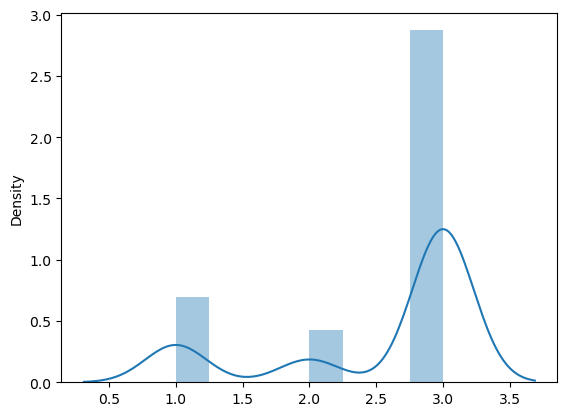

In [35]:
sns.distplot(x=df['Region'])
plt.show()

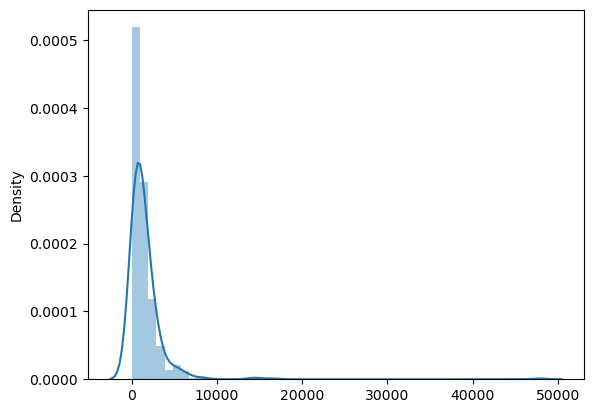

In [36]:
sns.distplot(x=df['Delicassen'])
plt.show()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [38]:
df.drop(['Channel','Region'],axis=1,inplace=True)
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [39]:
from sklearn .preprocessing import StandardScaler
stscaler = StandardScaler()
X=stscaler.fit_transform(df)
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [40]:
import scipy.cluster.hierarchy as sch

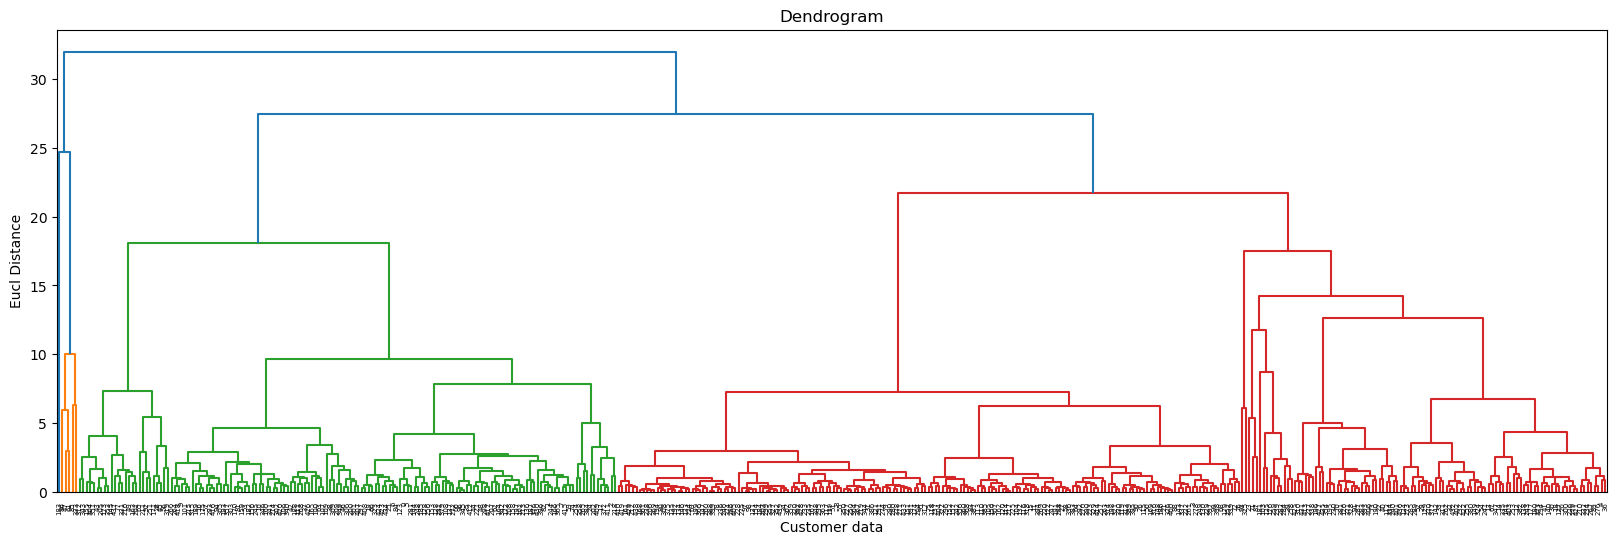

In [41]:
plt.figure(figsize=(20,6))
dendo = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer data')
plt.ylabel('Eucl Distance')
plt.show()

In [42]:
len(set(dendo['color_list']))-1

3

In [43]:
from sklearn.cluster import AgglomerativeClustering

In [44]:
model =  AgglomerativeClustering(n_clusters=3)
cluster=model.fit_predict(X)

In [45]:
cluster

array([2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1,

In [46]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [47]:
group_num=pd.DataFrame(cluster,columns=['Group'])
group_num

,Group
0,2
1,2
2,2
3,1
4,1
...,...
435,1
436,1
437,2
438,1


In [48]:
pd.concat([df,group_num],axis=1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,2
438,10290,1981,2232,1038,168,2125,1


In [49]:
Cust_group_data=pd.concat([df,group_num],axis=1)
Cust_group_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,2
438,10290,1981,2232,1038,168,2125,1


In [50]:
from sklearn.metrics import silhouette_score
silhouette_score(X,cluster)

0.2646091480214908

In [51]:
#Kmeans

In [52]:
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [53]:
from sklearn.cluster import KMeans
wcss = []
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [54]:
wcss

[2266.955266583246,
 1644.0598512347565,
 1326.6746082135528,
 1070.2551995135616,
 989.3326418885059,
 856.7070228388114,
 791.8280762163158,
 710.1943394067519,
 668.22250548469]

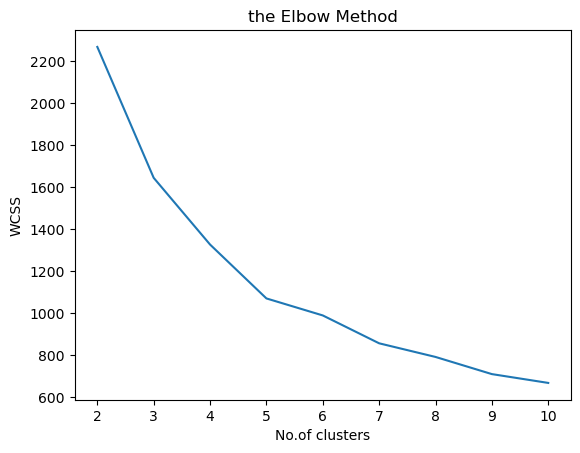

In [55]:
plt.plot(range(2,11),wcss)
plt.title('the Elbow Method')
plt.xlabel('No.of clusters')
plt.ylabel('WCSS')
plt.show()

In [56]:
kmeans = KMeans(n_clusters = 5, random_state = 309)
groups = model.fit_predict(X)
print(groups)

[2 2 2 1 1 2 2 2 1 2 2 1 1 1 1 1 2 2 1 2 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 2 1
 2 2 1 1 1 2 2 2 2 2 0 2 2 1 1 1 2 1 1 2 2 1 2 2 0 2 2 1 2 2 1 1 1 1 1 1 1
 2 1 1 2 1 1 1 2 2 1 2 0 0 1 1 1 1 1 2 1 2 1 2 1 1 1 2 2 2 1 1 1 2 2 2 2 1
 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 2 1 1
 1 1 1 1 1 2 1 2 2 1 2 2 2 1 1 2 2 2 2 1 1 1 2 2 2 2 1 2 1 1 2 1 1 1 2 0 1
 2 1 2 2 2 1 1 1 2 1 1 1 2 1 1 2 2 2 1 1 2 1 2 2 2 1 2 1 2 2 2 2 1 2 1 1 2
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 1 2 1 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 2 2 1 1 2 2 2 2 2 2 1 1 2 1 1 2 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1
 0 1 1 1 1 1 1 2 2 2 2 1 2 2 1 1 2 1 2 1 2 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 2 2 2 1 2 2 1 1 2 2 2 2 1 2 1 1 2 2 1 2 1 1 1 2 1 1 1 2 1 1 2 1 1]


In [57]:
groups.shape

(440,)

In [58]:
group_num=pd.DataFrame(groups,columns=['Group'])
group_num

,Group
0,2
1,2
2,2
3,1
4,1
...,...
435,1
436,1
437,2
438,1


In [59]:
cust_kmeans_data=pd.concat([df,group_num],axis=1)
cust_kmeans_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,2
438,10290,1981,2232,1038,168,2125,1


In [60]:
silhouette_score(X,groups)


0.2646091480214908

In [62]:
cust_kmeans_data[cust_kmeans_data['Group']==0]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
47,44466,54259,55571,7782,24171,6465,0
61,35942,38369,59598,3254,26701,2017,0
85,16117,46197,92780,1026,40827,2944,0
86,22925,73498,32114,987,20070,903,0
183,36847,43950,20170,36534,239,47943,0
333,8565,4980,67298,131,38102,1215,0


In [64]:
silhouette_score(X,groups)

0.2646091480214908

In [68]:
#DBSCAN

In [70]:
from sklearn.cluster import DBSCAN

In [72]:
dbscan = DBSCAN(eps=3.2,min_samples=10)
dbscan.fit(X)

DBSCAN(eps=3.2, min_samples=10)

In [76]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [80]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
df_cluster=pd.concat([df,cl],axis=1)

In [82]:
df_cluster

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,0


In [84]:
df_cluster[df_cluster['cluster']==-1]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
23,26373,36423,22019,5154,4337,16523,-1
47,44466,54259,55571,7782,24171,6465,-1
61,35942,38369,59598,3254,26701,2017,-1
85,16117,46197,92780,1026,40827,2944,-1
86,22925,73498,32114,987,20070,903,-1
93,11314,3090,2062,35009,71,2698,-1
181,112151,29627,18148,16745,4948,8550,-1
183,36847,43950,20170,36534,239,47943,-1
325,32717,16784,13626,60869,1272,5609,-1
333,8565,4980,67298,131,38102,1215,-1


In [88]:
silhouette_score(X,dbscan.labels_)

0.7738898379253679